## Imagine you are the boss of a casino.

You are the boss. You have two machines, you have to design a multi-armed bandit.


In [24]:
# use python library
import numpy as np
import time

# one: win money 
arm0 = 0.2
# another one: lose money 
arm1 = -0.2

# return random rewards
# draw random samples from a normal (Gaussian) distribution
def reward_dist(a):
  arms_true_value = [0.2, -0.2] # arm 0 and arm 1
  arms_std_devs = [2., 2.]
  return np.random.normal(arms_true_value[a], arms_std_devs[a])



Testing: 

two players: Tim and Tony 

In [25]:
tim_select_arm = 0

reward = reward_dist(tim_select_arm)

print("Tim", reward)

tony_select_arm = 1

reward = reward_dist(tony_select_arm)

print("Tony", reward)

tim_select_arm = 1

reward = reward_dist(tim_select_arm)

print("Tim", reward)

tony_select_arm = 0

reward = reward_dist(tony_select_arm)

print("Tony", reward)

Tim -3.4343319601418374
Tony -2.713153223270942
Tim -0.6672332499125427
Tony -0.16843453931324187


## Now imagine that you are a player

You will play 2 machines. What is your strategy?


### Strategy 1: random

In [26]:
import numpy as np

# the total number of arms
num_arms = 2 

# strategy - random
def choose_arm(num_arms):
  return np.random.randint(num_arms)

# now you play 20 times
total_t = 20
for i in range(total_t):
  chosen_arm = choose_arm(2)
  print(chosen_arm)



1
1
1
1
0
0
1
1
1
1
1
0
1
1
0
0
1
0
0
0


In [28]:
# arms
arms = [arm0,arm1]

# rewards_collected[0] for arm0, rewards_collected[1] for arm1 
rewards_collected = [[],[]]

# you play 10 times
total_t = 10
for i in range(total_t):
  # use a random strategy
  arm = choose_arm(2)

  r = reward_dist(arm) # machine returns reward 

  print("Play_time_step",i+1, ": choose arm", arm, ", receive_reward", r, ", (Hidden_arm_value", arms[arm],")")

  rewards_collected[arm].append(r)
  time.sleep(2)

# sum of rewards for arm0, sum of rewards for arm1
print("arm 0:", np.sum(rewards_collected[0]),"arm 1:", np.sum(rewards_collected[1]))

Play_time_step 1 : choose arm 1 , receive_reward 0.141207237933483 , (Hidden_arm_value -0.2 )
Play_time_step 2 : choose arm 0 , receive_reward -1.767219119856674 , (Hidden_arm_value 0.2 )
Play_time_step 3 : choose arm 1 , receive_reward 0.31038423146995525 , (Hidden_arm_value -0.2 )
Play_time_step 4 : choose arm 1 , receive_reward -1.5348982884561002 , (Hidden_arm_value -0.2 )
Play_time_step 5 : choose arm 0 , receive_reward 2.0165201456940265 , (Hidden_arm_value 0.2 )
Play_time_step 6 : choose arm 0 , receive_reward 1.0069052184095857 , (Hidden_arm_value 0.2 )
Play_time_step 7 : choose arm 1 , receive_reward 1.6419258254296332 , (Hidden_arm_value -0.2 )
Play_time_step 8 : choose arm 0 , receive_reward 1.3909860149812903 , (Hidden_arm_value 0.2 )
Play_time_step 9 : choose arm 1 , receive_reward -0.29137744120824416 , (Hidden_arm_value -0.2 )
Play_time_step 10 : choose arm 0 , receive_reward 3.4490057522454913 , (Hidden_arm_value 0.2 )
arm 0: 6.09619801147372 arm 1: 0.267241565168727


### Strategy 2: greedy

In [37]:
# number of arms
num_arms = 2

# record estimated values for each arm
estimated_values = np.zeros(num_arms)
print("Init:", estimated_values[0], estimated_values[1])

# record numbers of pulls or plays for each arm
num_pulls = np.zeros(num_arms)
print("Init:",  num_pulls[0], num_pulls[1])

# greedy: alway choose the current best, i.e. using argmax
def choose_arm_by_greedy(estimated_values):
  return np.argmax(estimated_values)

rewards_collected = [[0], [0]]
timestep_collected = [[0], [0]]

# play total_t rounds
total_t = 10
for i in range(total_t):
  # use greedy strategy
  arm = choose_arm_by_greedy(estimated_values)

  reward = reward_dist(arm) # machine from casino

  num_pulls[arm] += 1

  pre_estimated_value = estimated_values[arm]

  diff = reward - pre_estimated_value

  estimated_values[arm] = estimated_values[arm] + diff / num_pulls[arm]

  print("Play_time_step",i+1, ": choose arm", arm, ", receive_reward", reward, ", (Hidden_true_value", arms[arm],")")
  print(" --Previous estimated value", pre_estimated_value, "received_reward", reward, "difference between the recieved reward and the previous (old) estimated_values", diff, "-> Updated estimated_values", estimated_values[arm])
  rewards_collected[arm].append(reward)
  timestep_collected[arm].append(i+1)
  time.sleep(2)

print("arm 0", rewards_collected[0], np.sum(rewards_collected[0]))
print("arm 1", rewards_collected[1], np.sum(rewards_collected[1]))
print("Total", np.sum(np.sum(rewards_collected)))



Init: 0.0 0.0
Init: 0.0 0.0
Play_time_step 1 : choose arm 0 , receive_reward -1.1960234498659568 , (Hidden_true_value 0.2 )
 --Previous estimated value 0.0 received_reward -1.1960234498659568 difference between the recieved reward and the previous (old) estimated_values -1.1960234498659568 -> Updated estimated_values -1.1960234498659568
Play_time_step 2 : choose arm 1 , receive_reward 2.202760417027768 , (Hidden_true_value -0.2 )
 --Previous estimated value 0.0 received_reward 2.202760417027768 difference between the recieved reward and the previous (old) estimated_values 2.202760417027768 -> Updated estimated_values 2.202760417027768
Play_time_step 3 : choose arm 1 , receive_reward 0.006704618366169202 , (Hidden_true_value -0.2 )
 --Previous estimated value 2.202760417027768 received_reward 0.006704618366169202 difference between the recieved reward and the previous (old) estimated_values -2.1960557986615985 -> Updated estimated_values 1.1047325176969687
Play_time_step 4 : choose arm 

Plot figures

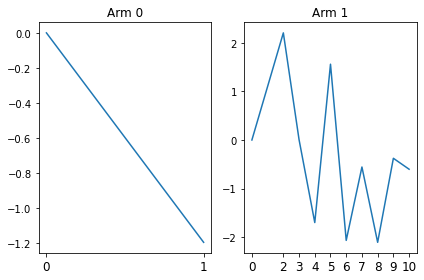

In [38]:
import matplotlib.pyplot as plt

ys = rewards_collected[0]
x = timestep_collected[0]

fig = plt.figure()
ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)

ax1.plot(x, ys, '-')
ax1.set_xticks(x) 
ax1.set_xticklabels(x, fontsize=12)

ax1.set_title("Arm 0")

ys = rewards_collected[1]
x = timestep_collected[1]
ax2.plot(x, ys, '-')
ax2.set_xticks(x) 
ax2.set_xticklabels(x, fontsize=12)

ax2.set_title("Arm 1")
plt.tight_layout()
plt.show()

In [40]:
# number of arms
num_arms = 2

# record estimated values for each arm
estimated_values = np.zeros(num_arms)
print("Init:", estimated_values[0], estimated_values[1])

# record numbers of pulls or plays for each arm
num_pulls = np.zeros(num_arms)
print("Init:",  num_pulls[0], num_pulls[1])

# e-greedy: 
# choose the current best, i.e. using argmax with probability 1-epsilon
# choose a random arm with probability epsilon
def choose_arm_by_egreedy(estimated_values, epsilon = 0.2):
  if np.random.random() > epsilon: 
    return np.argmax(estimated_values) # exploitation
  else:
    return np.random.randint(num_arms) # exploration


rewards_collected = [[0], [0]]
timestep_collected = [[0], [0]]

# play total_t rounds
total_t = 10
for i in range(total_t):
  # use greedy strategy
  arm = choose_arm_by_greedy(estimated_values)

  reward = reward_dist(arm) # machine from casino

  num_pulls[arm] += 1

  pre_estimated_value = estimated_values[arm]

  diff = reward - pre_estimated_value

  estimated_values[arm] = estimated_values[arm] + diff / num_pulls[arm]

  print("Play_time_step",i+1, ": choose arm", arm, ", receive_reward", reward, ", (Hidden_true_value", arms[arm],")")
  print(" --Previous estimated value", pre_estimated_value, "received_reward", reward, "difference between the recieved reward and the previous (old) estimated_values", diff, "-> Updated estimated_values", estimated_values[arm])
  rewards_collected[arm].append(reward)
  timestep_collected[arm].append(i+1)
  time.sleep(2)

print("arm 0", rewards_collected[0], np.sum(rewards_collected[0]))
print("arm 1", rewards_collected[1], np.sum(rewards_collected[1]))
print("Total", np.sum(np.sum(rewards_collected)))


Init: 0.0 0.0
Init: 0.0 0.0
Play_time_step 1 : choose arm 0 , receive_reward 1.688440641273201 , (Hidden_true_value 0.2 )
 --Previous estimated value 0.0 received_reward 1.688440641273201 difference between the recieved reward and the previous (old) estimated_values 1.688440641273201 -> Updated estimated_values 1.688440641273201
Play_time_step 2 : choose arm 0 , receive_reward -1.7618983664791734 , (Hidden_true_value 0.2 )
 --Previous estimated value 1.688440641273201 received_reward -1.7618983664791734 difference between the recieved reward and the previous (old) estimated_values -3.4503390077523743 -> Updated estimated_values -0.036728862602986245
Play_time_step 3 : choose arm 1 , receive_reward 1.5381054162607013 , (Hidden_true_value -0.2 )
 --Previous estimated value 0.0 received_reward 1.5381054162607013 difference between the recieved reward and the previous (old) estimated_values 1.5381054162607013 -> Updated estimated_values 1.5381054162607013
Play_time_step 4 : choose arm 1 , 

plot figures

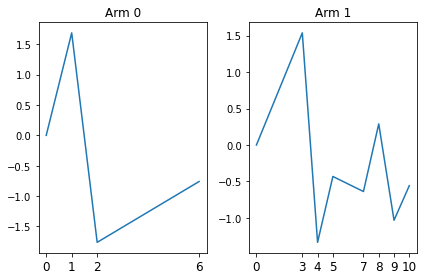

In [41]:
import matplotlib.pyplot as plt

ys = rewards_collected[0]
x = timestep_collected[0]

fig = plt.figure()
ax1 = plt.subplot2grid((1, 2), (0, 0), rowspan=1, colspan=1)
ax2 = plt.subplot2grid((1, 2), (0, 1), rowspan=1, colspan=1)

ax1.plot(x, ys, '-')
ax1.set_xticks(x) 
ax1.set_xticklabels(x, fontsize=12)

ax1.set_title("Arm 0")

ys = rewards_collected[1]
x = timestep_collected[1]
ax2.plot(x, ys, '-')
ax2.set_xticks(x) 
ax2.set_xticklabels(x, fontsize=12)

ax2.set_title("Arm 1")
plt.tight_layout()
plt.show()